# Homework 1.1
### Mihai Croicu
#### 2019-07-24

## Exercise 1.

Helper functions

In [2]:
beta_mean <- function (a,b) {
  # Calculate E[X] for given a,b in beta_distribution.
  return (a/(a+b))
}

beta_variance <- function (a,b) {
  # Calculate Var[x] for given a,b in beta_distribution
  (a*b)/(((a+b)^2)*(a+b+1))
}

#Test that they work
#Sample a lot of data from the distribution and see whether it (nearly) matches with the analytical formulas
if (abs(round(beta_variance(2,5),4)-round(var(rbeta(1000000,2,5)),4))<0.01) {
    print("Variance Function OK")
}

if (abs(round(beta_mean(2,5),4)-round(mean(rbeta(1000000,2,5)),4))<0.01) {
    print("Mean Function OK")
}

[1] "Variance Function OK"
[1] "Mean Function OK"


#### Code below specifies the a and b of the three chosen distributions.

In [3]:
vector_a <- c(1,5,23)
vector_b <- c(1,3,2)

#### Plotting code

[1] "Distribution no. 1 a=1 b=1 E(X)=0.5 Var(X)=0.0833"
[1] "Distribution no. 2 a=5 b=3 E(X)=0.625 Var(X)=0.026"
[1] "Distribution no. 3 a=23 b=2 E(X)=0.92 Var(X)=0.0028"


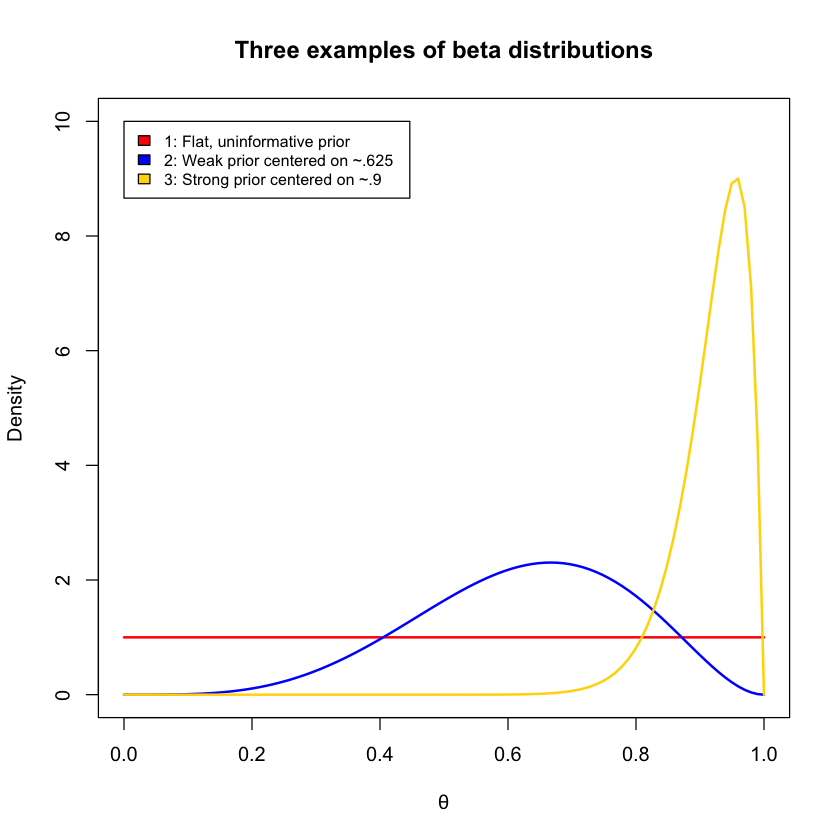

In [4]:
# I need this because I have to reconfigure my environment to accept UTF-8 everywhere. 
#There's a bug on my machine
options(warn=-1)

# Store the vector or a and b in a dataframe
hyper <- cbind(vector_a,vector_b)
colnames(hyper) <- c("a", "b")

# Create a sequence over the probability space
x <- seq(0, 1, length=100)

# Initialize a plot.
plot(1,'n',xlab="θ",
     ylab="Density", main="Three examples of beta distributions",
     ylim=c(0,10), xlim=c(0,1))

# Get a simple color palette 
color_map <- c("red", "blue", "gold", "green")

# Plot the distributions in our vectors of a and b, one at a time:
# Also print the values of a, b
# the mean (expected value) of the distribution
# and the variance of the distribution 

for (i in 1:length(vector_a)) {
  hx <- dbeta(x,hyper[[i,'a']],hyper[[i,'b']])
  e_x = round(beta_mean(hyper[[i,'a']],hyper[[i,'b']]),4)
  var_x = round(beta_variance(hyper[[i,'a']],hyper[[i,'b']]),4)
  print(paste0('Distribution no. ',i,' a=',hyper[[i,'a']],' b=',hyper[[i,'b']], ' E(X)=',e_x, ' Var(X)=',var_x))
  lines(x,hx,lwd=2, col=color_map[i])
}

legend(0, 10, legend=c("1: Flat, uninformative prior",
                       "2: Weak prior centered on ~.625",
                       "3: Strong prior centered on ~.9"),
       colors <- color_map, 
       cex=0.8)


**Distribution 1 (a=1, b=1)** is a flat, uninformative prior. Throught the parameter space (0,1), it has the same density (.5). Thus, the posterior distribution will be influenced completely by the likelihood function applied to the data - when multiplying the likelihoodd distribution with the prior distribution it will be proportional with the likelihood distribution  $p(y|\theta) * p(\theta) \propto p(y|\theta)$ , thus $p(y|\theta) \propto p(\theta|y)$

**Distribution 2 (a=5, b=3)** is a relatively weak prior, centered fairly close to the mean, with relatively long tails (high variance). It would contribute some information to the posterior distribution (if a binomial model is employed, this would be corresponding to the addition of 5 successful observations and 3 failures - indicating prior assumptions of a slightly higher probability of success than failure. However, it would not contribute much even if the study has an n of 50.

**Distribution 3 (a=20 b=2)** is a relatively strong and highly informative prior, centered  around 0.9 and with a very small variance. In a model run on 100 observations it would contribute nearly a quarter of the information provided by the data itself - equivalent to adding 23 successful trials vs. 2 failures.

The prior described by **Distribution 3** could be of use in a new study where there is considerable pre-existing information unequivocally pointing in a single direction. 

One example, in international relations, such a strong prior would make sense when (re-)researching democratic peace, one of the strongest relationships known in the field, where the probability of peace between two democratic countries is found, by countless studies, both qualitative, theoretical and empirical, using many datasets, to be very high and very certain. 

Any research disproving such a well-reseached topic would require a very large amount of unequivocal evidence disproving the relationship.

In [6]:
beta_mean(1,1)
beta_variance(1,1)

[1] 0.5

[1] 0.08333333

#### Let's also try the Gamma distribution

[1] "Distribution no. 1 a=4 b=3 E(X)=0.5714 Var(X)=0.0306"
[1] "Distribution no. 2 a=5 b=3 E(X)=0.625 Var(X)=0.026"
[1] "Distribution no. 3 a=7 b=8 E(X)=0.4667 Var(X)=0.0156"


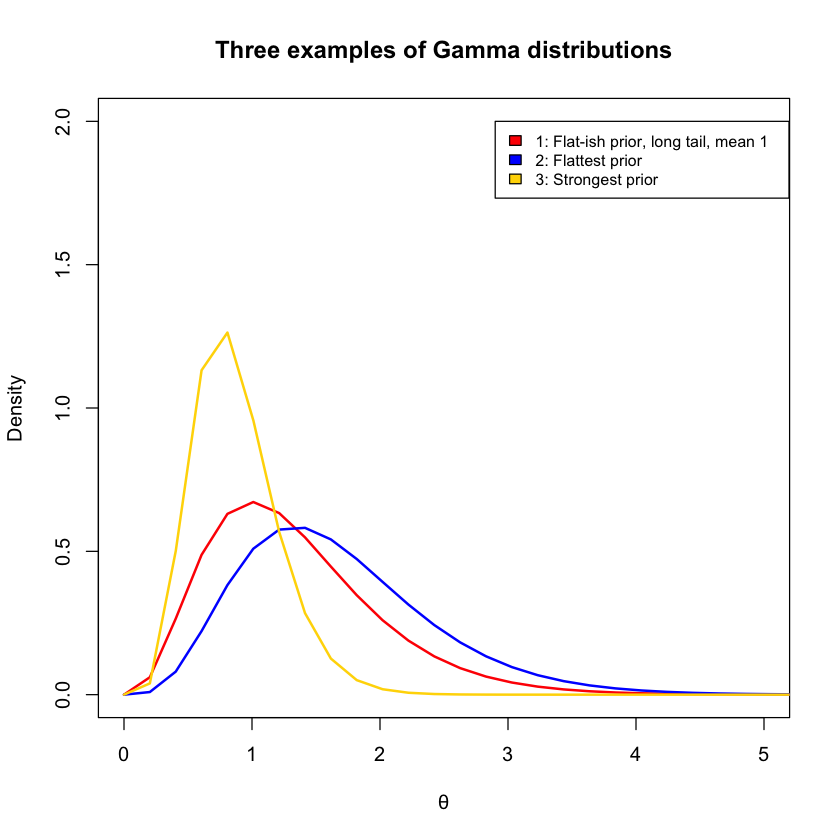

In [48]:
vector_a <- c(4,5,7)
vector_b <- c(3,3,8)

hyper <- cbind(vector_a,vector_b)
colnames(hyper) <- c("a", "b")

# Create a sequence over the probability space
x <- seq(0, 20, length=100)


plot(1,'n',xlab="θ",
     ylab="Density", main="Three examples of Gamma distributions",
     ylim=c(0,2), xlim=c(0,5))

# Get a simple color palette 
color_map <- c("red", "blue", "gold", "green")

# Plot the distributions in our vectors of a and b, one at a time:
# Also print the values of a, b
# the mean (expected value) of the distribution
# and the variance of the distribution 

for (i in 1:length(vector_a)) {
  hx <- dgamma(x,hyper[[i,'a']],hyper[[i,'b']])
  e_x = round(beta_mean(hyper[[i,'a']],hyper[[i,'b']]),4)
  var_x = round(beta_variance(hyper[[i,'a']],hyper[[i,'b']]),4)
  print(paste0('Distribution no. ',i,' a=',hyper[[i,'a']],' b=',hyper[[i,'b']], ' E(X)=',e_x, ' Var(X)=',var_x))
  lines(x,hx,lwd=2, col=color_map[i])
}

legend(2.9, 2.0, legend=c("1: Flat-ish prior, long tail, mean 1",
                       "2: Flattest prior",
                       "3: Strongest prior"),
       colors <- color_map, 
       cex=0.8)


### Exercise 2.

Preparatory work. Load the data, see that it is correctly loaded.

In [44]:
#Load the data
y=read.csv('https://www.dropbox.com/s/hhfzj17mqu5uyti/Week1.csv?dl=1')
#Check the data has loaded correctly
#Make it a vector instead of a df
y=y$y
head(y)

[1]  9  8  9 10  9 12

In [9]:
#n
n=length(y)
n

[1] 1000

In [10]:
#mean
mean_y=mean(y)
mean_y

[1] 9.929

#### Task 1: MLE estimation.

In [46]:
#Let's do MLE.
#GLM can fit Poissons, using the standard R formula language.
model <- glm(y~1, family="poisson")
#Get the coefficient of the model (which should be 9.929). Since this is log(lambda), exponentiate.
lambda_mle=exp(coef(model))[[1]]
#And the 95% confidence intervals
confint_mle = exp(confint(model))
paste("MLE lambda:", lambda_mle)
paste("MLE CI 95%:",confint_mle[[1]], ' to ' , confint_mle[[2]])

Waiting for profiling to be done...


[1] "MLE lambda: 9.92900000000106"

[1] "MLE CI 95%: 9.73497802385141  to  10.1255809055812"

#### Task 2+3: Two priors, a weak one and a strong one

[1] "mean strong: 20 variance strong: 0.2"

[1] "mean weak: 20 variance weak: 20"

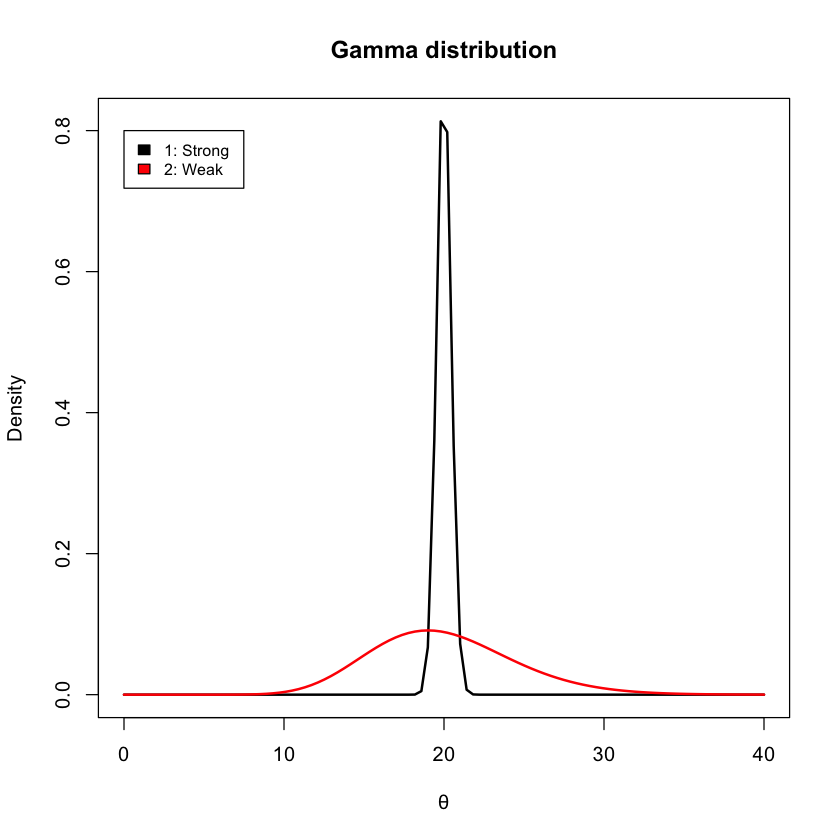

In [49]:
#Formula definition: dgamma(x, shape, rate = 1, scale = 1/rate, log = FALSE)
#a corresponds to mean of the counts
#b corresponds to adding observations

a_weak=20
b_weak=1

a_strong=2000
b_strong=100

#Let's check that the requirements of the prior are the ones set in the task.
paste("mean strong:",a_strong/b_strong, "variance strong:",a_strong/b_strong^2)
paste("mean weak:",a_weak/b_weak, "variance weak:",a_weak/b_weak^2)
#Yup, they are.


#I want to plot these, to see how they actually look like, in real life.
x <- seq(0, 40, length=100)

hx_weak=dgamma(x,shape=a_weak,rate=b_weak)
hx_strong=dgamma(x,shape=a_strong,rate=b_strong)

plot(x, hx_strong, type="l", lty=1,lwd=2, xlab="θ",
     ylab="Density", main="Gamma distribution")
lines(x,hx_weak,lwd=2, col='red')
legend(0, 0.8, legend=c("1: Strong ",
                       "2: Weak"),
       colors <- c('black','red'), 
       cex=0.8)

Fit to get the posterior. 
Per Gelman(2014) (and the assignment), the posterior gamma distribution for a Poisson likelihood is:
$\Gamma(\alpha + n*y_{mean}, \beta + n)$

In [13]:
paste ("Just to check that we have not messed up the values: n:", n, " y_mean:", mean_y)

#Apply the posterior distribution for the Gamma-Poisson from Gelman
#I have no idea how to fit this in a smarter, better, way except copy-pasting the analytical solution from the book...

#Weak
post_a_weak = a_weak + n * mean_y
post_b_weak = b_weak + n
#Strong
post_a_strong = a_strong + n * mean_y
post_b_strong = b_strong + n

[1] "Just to check that we have not messed up the values: n: 1000  y_mean: 9.929"

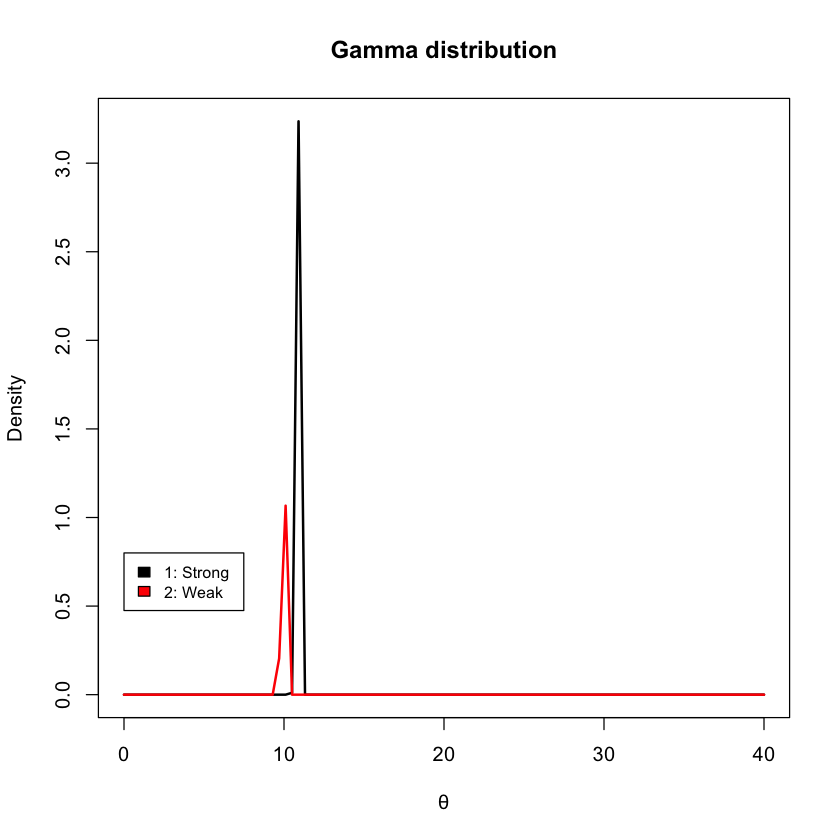

In [284]:
#And let's generate the posterior distributions

post_weak=dgamma(x,shape=post_a_weak,rate=post_b_weak)
post_strong=dgamma(x,shape=post_a_strong,rate=post_b_strong)

#Let's plot this:

plot(x, post_strong, type="l", lty=1,lwd=2, xlab="θ",
     ylab="Density", main="Gamma distribution")
lines(x,post_weak,lwd=2, col='red')
legend(0, 0.8, legend=c("1: Strong ",
                       "2: Weak"),
       colors <- c('black','red'), 
       cex=0.8)

In [47]:
#And take out the quartiles
paste("Weak prior:")
ci_weak=qgamma(c(0.025,0.975),shape=post_a_weak,rate=post_b_weak)
mean_weak=qgamma(c(0.5),shape=post_a_weak,rate=post_b_weak)
paste("Mean:   ",mean_weak)
paste("Credible Interval:     ","0.025:",ci_weak[1],"   0.975:", ci_weak[2])

paste("*******")
paste("Strong prior:")
ci_strong=qgamma(c(0.025,0.975),shape=post_a_strong,rate=post_b_strong)
mean_strong=qgamma(c(0.5),shape=post_a_strong,rate=post_b_strong)
paste("Mean:   ",mean_strong)
paste("Credible Interval:     ","0.025:",ci_strong[1],"   0.975:", ci_strong[2])

[1] "Weak prior:"

[1] "Mean:    9.93872794071146"

[1] "Credible Interval:      0.025: 9.74470819311326    0.975: 10.1353060847991"

[1] "*******"

[1] "Strong prior:"

[1] "Mean:    10.8442424257478"

[1] "Credible Interval:      0.025: 10.6508013914885    0.975: 11.0400116034775"

With a *weak prior* the mean of $\lambda$ is very, very close to the MLE estimate. The credible intervals are slightly shifted from the MLE estimate, but essentially by nothing. It's clear that the added observation does nothing really.

With a *strong prior*, the mean of $\lambda$ is shifted quite a bit towards the prior - the impact of the 100 equivalent prior observations (10% of the dataset), each bringing an "approximate" value of lambda of 20 moves to estimate of lambda quite a bit towards 20. *(is this correct interpretation? Is there better formalism? ASK!)*

#### Task 4 : explain to an undergrad...


*An explanation for the substantive interpretation of the the prior:*

Remember the likelihood function for the Poisson distribution is of the exponential type:

$L(y|\lambda) \propto e^{-n\lambda}*\lambda^{\sum_1^n{y_i}}$  (Gelman et al, 2014:43-44), 

where $y_i$ is one observation drawn from n total number of observations.

The posterior distribution looks like this (with $\alpha$ and $\beta$ being the hyperparameters of the prior $\Gamma(\alpha,\beta)$ distribution):

$P(\lambda|y) \propto e^{-(n+\beta)\lambda}*\lambda^{\sum_1^n{y_i+\alpha-1}}$

Check what happens:

The only way $\beta$ in the prior distribution affects the likelihood, and thus the estimated parameter $\lambda$ (which is what we're after) (against the MLE approach or a completely flat prior) is by adding itself to $n$, the number of observations in the exponent of $e$. If we have 100 observations, and we set a prior with a beta of 5, instead of $-100*\lambda$, we will have $-105*\lambda$. Same for $\alpha$, which, however, adds itself in the exponent of $\lambda$ ($\sum_1^n{y_i+\alpha-1}$), where the only other term affecting lambda (again, the parameter we want estimated) is $y_i$, i.e. the observations themselves.
